## Estimating the Value at Risk (VaR) of a Stock 

Value at Risk is a measure of the risk of loss for investments. VaR is a metric that is used to describe the degree of financial risk experienced by a company or portfolio over a given period of time. VaR can be computed at different confidence levels. As a risk measure, VaR also provides an estimate of the maximum loss from a stock or portfolio over time.

###### Interpreting VaR

A daily VaR of 6.5% with 95% confidence implies that:
- there is a 5% condfidence that your portfolio will lose 6.5% in a day.
- or we have 95% confidence that our portfolio will lose 6.5% or more in a day.

Similarly:
"We have a portfolio VaR of 50,000 euros over the next month at 95% confidence"
This means that, with 95% confidence, we can say that the portfolio's loss will not exceed 50,000 euros in a month.


In this work, I will demonstrate the steps used to calculate this metric across a portfolio of stocks.

#### Estimating VaR
Two main ways are used in estimating VaR.
- 1) Parametric VaR (Varaince-Covariance method): First identifies the mean or expeceted value and standard deviation of a portfolio.


- 2) Monte Carlo Simulation : Monte Carlo Simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present.


In this work, we focus on the first method. The parametric method examines historical price movements using standard deviation and the mean price of a given stock or portfolio of stocks over a given period in the past (retrospective observation) and then uses probability theory to calculate the maximum loss in a given confidence interval.

###### Assumptions
We note the following assumptions about the standard VaR calculation:

- Normal distribution of returns - VaR assumes that the portfolio return is normally distributed. Of course, this isn't realistic for most resources, but it allows us to develop a baseline with a much simpler calculation. (NB, It is possible to make changes to the VaR to take into account different distributions)

- Standard market conditions - VaR is best used to account for losses in standard markets and is not suitable for extremes / outliers just like many financial instruments.

###### Steps to calculate the VaR of a portfolio

- Calculate periodic returns of the stocks in the portfolio - Simple return/log return
- Create a covariance matrix based on the returns
- Calculate the portfolio mean and standard deviation
- Normal Distribution
- Confidence Interval

### Import neccessary Data

We import out data from Yahoo Finance for the period ‘2022-1-1’ until today "2022-12-31". <br />

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
sns.set()

tickers = ['BAS.DE','DB1.DE','DTE.DE','SIE.DE']
Data = pd.DataFrame()
for t in tickers:
    Data[t] = wb.DataReader(t, data_source='yahoo', start='2022-1-1', end = '2022-12-31')['Adj Close']   

### Step 1 : Calculate the Log Returns of stock in the Portfolio
We begin by calculating the daily returns of our portfolio. We then visaual the daily returns and note that, the returns are normally distributed and have a stable mean.

In [2]:
returns = np.log( Data / Data.shift(1))     #or returns = Data.pct_change() i.e, daily change returns/ daily percentage returns
#returns = Data.pct_change()
#returns

Text(20.503287500000006, 0.5, 'Frequency')

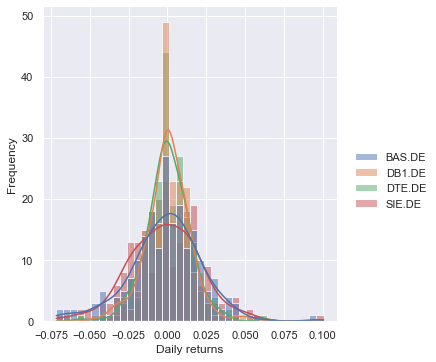

In [3]:
sns.displot(returns, kde=True)
plt.xlabel("Daily returns")
plt.ylabel("Frequency")

### Step 2 : Calculate the Variance-Covariance Matrix
Next, we find the variance-covariance matrix. Diagonal entries represnts the variance whiles off-diagonal represents the covariance between the companies.

\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

In [4]:
cov_matrix = returns.cov()
cov_matrix

,BAS.DE,DB1.DE,DTE.DE,SIE.DE
BAS.DE,0.000552,0.000089,0.000168,0.000410
DB1.DE,0.000089,0.000205,0.000068,0.000102
DTE.DE,0.000168,0.000068,0.000204,0.000190
SIE.DE,0.000410,0.000102,0.000190,0.000543


### Step 3 : Portfolio Risk (Standard Deviation) and Portfolio Expected Return (Mean) 
Here, we compute the expected return and volatility of the portfolio under consideration.

In [5]:
avgerage_returns = returns.mean()               #Expected returns is the mean/average returns
print(avgerage_returns)

BAS.DE   -0.001141
DB1.DE    0.000520
DTE.DE    0.000601
SIE.DE   -0.001622
dtype: float64


In [6]:
count = returns.count()[0]                   #daily_returns.count()
count  

207

In [7]:
weights = np.array([0.5, 0.5, 0.5, 0.5])      #equal weighted portfolio

In [8]:
portfolio_mean =  avgerage_returns @ weights                                 #expected daily return of our portfolio
portfolio_std  =  np.sqrt(weights.T @ cov_matrix @ weights)             #pfolio_vol
print(portfolio_mean)
print(portfolio_std)

-0.0008207971735991484
0.0298234107254952


### Step 4 : Normal Distribution
- We obtain a normal distribution based on the portfolio mean and portfolio standard deviation. 

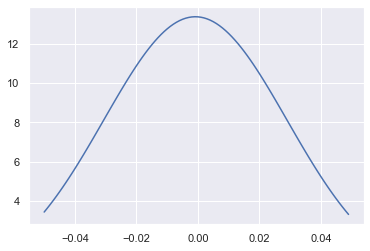

In [9]:
x=np.arange(-0.05,0.05,0.001)                      #x-axis
norm_dist = norm.pdf(x,portfolio_mean,portfolio_std) 

plt.plot(x,norm_dist,color='b')
plt.show()

### VaR

We compute VaR by considering a confidence level of  0.05. If I run the code below, we observe that the VaR is equal to -4.99%. This implies that, I have 95 confidence that my portfolio will not lose more than -4.99% in a day.    

In [10]:
confidence_level = 0.05
VaR=norm.ppf(confidence_level,portfolio_mean,portfolio_std)
print(VaR)
Var_per = print (str(round(VaR, 4) * 100) + ' %')
print(Var_per)

-0.04987594247349338
-4.99 %
None


### VaR for specified Days

- Suppose we consider 5 days and run the code below, we observe that in 5 days, the portfolio will not lose 8.64% of its value. 

In [11]:
num_days = 3
VaR_5d = VaR*np.sqrt(num_days)
print(VaR_5d)
VaR_per = print (str(round(VaR_5d, 4) * 100) + ' %')

-0.08638766643947307
-8.64 %


### Step 5 : The confidence interval

Formula:
$$ C.L = \bar{x} - Z_{\frac{\sigma}{2}}.\frac{\sigma}{\sqrt{n}}
$$

Considering a confidence  level of 95%. On this value, the value of Z is equal to 2 given the formula for confidence interval. 
The value of Z at 95% confidence is equal to 2.

- NB: For different confidence levels, you'll have to refer to the Z-table which can be available on google or any other platform as well. 

So here, I'll be using Z=2 and then $\sigma$ is the portfolio risk which is standard deviation of the portfolio, $\bar{x}$ this is portfolio mean and $n$ represents the count if you remember the 207 number. We run the following codes for the confidence interval and plot these intervals on a normal distribution.

In [12]:
CL_lower =portfolio_mean - 2*portfolio_std/np.sqrt(count)
CL_upper =portfolio_mean + 2*portfolio_std/np.sqrt(count)
print(CL_lower)
print(CL_upper)

-0.004966537848672556
0.0033249435014742587


Text(20.503287500000006, 0.5, 'Frequency')

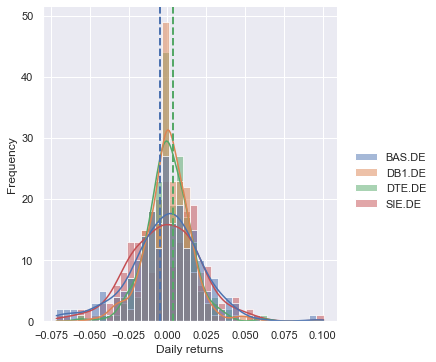

In [13]:
sns.displot(returns, kde=True)

plt.axvline(CL_lower,color='b',linestyle='dashed',linewidth=2)
plt.axvline(CL_upper,color='g',linestyle='dashed',linewidth=2)


plt.xlabel("Daily returns")
plt.ylabel("Frequency")


## Conclusion

The above computation is the confidence interval of our portfolio. This implies that, we are 95% percent confident that the daily return of our portfolio will be  between CL_lower and CL_upper.